In [1]:
import pandas as pd
import numpy as np

### Loading sample of big data
df1 = pd.read_csv("Feb_2020_ontime.csv", skiprows = lambda x: x>0 and np.random.rand() > 0.01)

### Avoid Unnamed: 0 columns
df2 = pd.read_csv("Feb_2020_ontime.csv", index_col=0)

In [2]:
### Convert a wide DF into a long one
d = {\
"zip_code": [12345, 56789, 101112, 131415],
"factory": [100, 400, 500, 600],
"warehouse": [200, 300, 400, 500],
"retail": [1, 2, 3, 4]
}

df3 = pd.DataFrame(d)

# location_type is generated automatically from the columns left after specifying id_vars (you can pass a list also)
df3 = df3.melt(id_vars = "zip_code", var_name = "location_type", value_name = "distance")
df3

,zip_code,location_type,distance
0,12345,factory,100
1,56789,factory,400
2,101112,factory,500
3,131415,factory,600
4,12345,warehouse,200
5,56789,warehouse,300
6,101112,warehouse,400
7,131415,warehouse,500
8,12345,retail,1
9,56789,retail,2


In [4]:
### Convert year and day of year into a single datetime column
d = {\
"year": [2019, 2019, 2020],
"day_of_year": [350, 365, 1]
}

df4 = pd.DataFrame(d)
df4["date"] = pd.to_datetime(df4["year"]*1000 + df4["day_of_year"], format = "%Y%j")
df4

,year,day_of_year,date
0,2019,350,2019-12-16
1,2019,365,2019-12-31
2,2020,1,2020-01-01


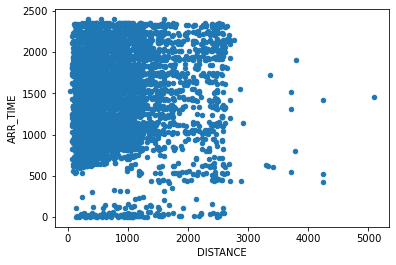

In [5]:
### Interactive plots out of the box in pandas

df1.plot(kind = "scatter", x = "DISTANCE", y = "ARR_TIME")

In [6]:
print(df2.isnull().sum().sum())
print(df2.isna().sum())
print(df2.isna().any())
print(df2.isna().any(axis = None))

596069
DAY_OF_WEEK                   0
OP_UNIQUE_CARRIER             0
OP_CARRIER_AIRLINE_ID         0
OP_CARRIER                    0
TAIL_NUM                    433
OP_CARRIER_FL_NUM             0
ORIGIN_AIRPORT_ID             0
ORIGIN_AIRPORT_SEQ_ID         0
ORIGIN                        0
DEST_AIRPORT_ID               0
DEST_AIRPORT_SEQ_ID           0
DEST                          0
DEP_TIME                   4938
DEP_DEL15                  4951
DEP_TIME_BLK                  0
ARR_TIME                   5287
ARR_DEL15                  6192
CANCELLED                     0
DIVERTED                      0
DISTANCE                      0
Unnamed: 21              574268
dtype: int64
DAY_OF_WEEK              False
OP_UNIQUE_CARRIER        False
OP_CARRIER_AIRLINE_ID    False
OP_CARRIER               False
TAIL_NUM                  True
OP_CARRIER_FL_NUM        False
ORIGIN_AIRPORT_ID        False
ORIGIN_AIRPORT_SEQ_ID    False
ORIGIN                   False
DEST_AIRPORT_ID          Fals

In [10]:
### Combine the small categories into a single category named "Others" (using frequencies)
d = {"genre": ["A", "A", "A", "A", "A", "B", "B", "C", "D", "E", "F"]}

df5 = pd.DataFrame(d)

frequencies = df5["genre"].value_counts(normalize = True)
small_categories = frequencies[frequencies < 0.1].index
df5["genre"] = df5["genre"].replace(small_categories, "Other")
df5["genre"].value_counts(normalize = True)

A        0.454545
Other    0.363636
B        0.181818
Name: genre, dtype: float64

In [13]:
### Clean Object column with mixed data using regex
d = {"customer": ["A", "B", "C", "D"], "sales":[1100, 950.75, "$400", "$1250.35"]}
df6 = pd.DataFrame(d)
df6["sales"] = df6["sales"].replace("[$,]", "", regex = True).astype("float")
df6

,customer,sales
0,A,1100.00
1,B,950.75
2,C,400.00
3,D,1250.35


In [14]:
### Creating a time series dataset for testing
number_or_rows = 365*24 # hours in a year
pd.util.testing.makeTimeDataFrame(number_or_rows, freq="H")

C:\Users\luuducthang\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\util\__init__.py:12: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing


,A,B,C,D
2000-01-01 00:00:00,-1.268800,0.130301,1.542518,0.570908
2000-01-01 01:00:00,-0.183760,-0.011161,-0.670054,-1.095808
2000-01-01 02:00:00,-0.400164,-0.853932,-0.649113,0.259138
2000-01-01 03:00:00,-0.495845,0.521565,0.398020,0.238240
2000-01-01 04:00:00,-0.795009,0.576133,0.216194,1.050458
...,...,...,...,...
2000-12-30 19:00:00,-1.331278,-0.130039,0.297976,-0.683389
2000-12-30 20:00:00,-1.443672,-0.838746,-0.517290,0.066717
2000-12-30 21:00:00,1.218005,0.117512,-0.600987,0.520169
2000-12-30 22:00:00,-0.415560,-0.247300,-0.672311,-0.371594


In [18]:
### Moving columns to a specific location

d = {"A":[15, 20], "B":[20, 25], "C":[30 ,40], "D":[50, 60]}
df7 = pd.DataFrame(d)
df7.insert(3, "C2", df7["C"]*2)

df7["C3"] = df7["C"]*3
columns = df7.columns.to_list()
location = 4
columns = columns[:location] + ["C3"] + columns[location:-1]
df7 = df7[columns]
df7

,A,B,C,C2,C3,D
0,15,20,30,60,90,50
1,20,25,40,80,120,60


In [19]:
### Split names into first and last name
df8 = pd.Series(["Geordi La Forge", "Deanna Troi", "Data"]).to_frame()
df8.rename({0:"names"}, inplace = True, axis = 1)

df8["first_name"] = df8["names"].str.split(n = 1).str[0]
df8["last_name"] = df8["names"].str.split(n = 1).str[1]
df8

,names,first_name,last_name
0,Geordi La Forge,Geordi,La Forge
1,Deanna Troi,Deanna,Troi
2,Data,Data,NaN
